In [1]:
import numpy as np
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Coca-Cola_stock_history.csv')
df

,Date,Open,High,Low,Close,Volume
0,2-Jan-2015,32.920146,33.029207,32.561811,32.826668,9921100
1,5-Jan-2015,33.255112,33.473231,32.779930,32.826668,26292600
2,6-Jan-2015,33.037005,33.449870,32.904578,33.075954,16897500
3,7-Jan-2015,33.340801,33.582290,33.169425,33.488811,13412300
4,8-Jan-2015,33.636821,33.940627,33.574500,33.893887,21743600
...,...,...,...,...,...,...
1964,20-Oct-2022,55.770000,55.919998,54.959999,55.080002,16905100
1965,21-Oct-2022,55.000000,56.110001,54.990002,55.959999,15028000
1966,24-Oct-2022,56.639999,57.730000,56.570000,57.570000,17416700
1967,25-Oct-2022,59.040001,59.110001,57.750000,58.950001,28829900


In [3]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Volume
1968,26-Oct-2022,59.009998,59.779999,58.860001,59.389999,15831400


In [4]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Volume
0,2-Jan-2015,32.920146,33.029207,32.561811,32.826668,9921100
1,5-Jan-2015,33.255112,33.473231,32.779930,32.826668,26292600
2,6-Jan-2015,33.037005,33.449870,32.904578,33.075954,16897500
3,7-Jan-2015,33.340801,33.582290,33.169425,33.488811,13412300
4,8-Jan-2015,33.636821,33.940627,33.574500,33.893887,21743600
...,...,...,...,...,...,...
1963,19-Oct-2022,56.310001,56.540001,55.730000,55.959999,10182300
1964,20-Oct-2022,55.770000,55.919998,54.959999,55.080002,16905100
1965,21-Oct-2022,55.000000,56.110001,54.990002,55.959999,15028000
1966,24-Oct-2022,56.639999,57.730000,56.570000,57.570000,17416700


In [5]:
days = list()
close_prices = list()

In [6]:
df_days = df.loc[:, 'Date']
df_close_prices = df.loc[:, 'Close']

In [7]:
for day in df_days:
    days.append([int(day.split('-')[0])])

for price in df_close_prices:
    close_prices.append(float(price))

In [8]:
days

[[2],
 [5],
 [6],
 [7],
 [8],
 [9],
 [12],
 [13],
 [14],
 [15],
 [16],
 [20],
 [21],
 [22],
 [23],
 [26],
 [27],
 [28],
 [29],
 [30],
 [2],
 [3],
 [4],
 [5],
 [6],
 [9],
 [10],
 [11],
 [12],
 [13],
 [17],
 [18],
 [19],
 [20],
 [23],
 [24],
 [25],
 [26],
 [27],
 [2],
 [3],
 [4],
 [5],
 [6],
 [9],
 [10],
 [11],
 [12],
 [13],
 [16],
 [17],
 [18],
 [19],
 [20],
 [23],
 [24],
 [25],
 [26],
 [27],
 [30],
 [31],
 [1],
 [2],
 [6],
 [7],
 [8],
 [9],
 [10],
 [13],
 [14],
 [15],
 [16],
 [17],
 [20],
 [21],
 [22],
 [23],
 [24],
 [27],
 [28],
 [29],
 [30],
 [1],
 [4],
 [5],
 [6],
 [7],
 [8],
 [11],
 [12],
 [13],
 [14],
 [15],
 [18],
 [19],
 [20],
 [21],
 [22],
 [26],
 [27],
 [28],
 [29],
 [1],
 [2],
 [3],
 [4],
 [5],
 [8],
 [9],
 [10],
 [11],
 [12],
 [15],
 [16],
 [17],
 [18],
 [19],
 [22],
 [23],
 [24],
 [25],
 [26],
 [29],
 [30],
 [1],
 [2],
 [6],
 [7],
 [8],
 [9],
 [10],
 [13],
 [14],
 [15],
 [16],
 [17],
 [20],
 [21],
 [22],
 [23],
 [24],
 [27],
 [28],
 [29],
 [30],
 [31],
 [3],
 [4],
 [5],
 [6

In [9]:
close_prices

[32.82666779,
 32.82666779,
 33.07595444,
 33.48881149,
 33.89388657,
 33.51996994,
 33.21617126,
 33.20838547,
 33.15384674,
 33.01362991,
 33.13047791,
 33.62123108,
 33.77703857,
 34.10420227,
 33.7380867,
 33.49660873,
 33.02141571,
 32.6552887,
 32.79551315,
 32.07104874,
 32.39822006,
 32.42938995,
 32.4683342,
 32.55403137,
 32.28916931,
 32.11779404,
 33.02921295,
 33.0058403,
 32.85004044,
 32.70982742,
 32.56960678,
 32.50727844,
 32.80329895,
 32.69425201,
 32.60076523,
 32.81887817,
 32.75656128,
 33.07595444,
 33.73030472,
 33.65240097,
 33.45765686,
 33.10709763,
 33.02921295,
 32.34369278,
 32.24241638,
 31.6971283,
 31.23753738,
 31.86589432,
 31.34750175,
 31.64596939,
 31.81876373,
 31.88945961,
 31.43388939,
 31.92874527,
 31.90516853,
 31.78735352,
 31.77163887,
 31.69309044,
 31.48101425,
 31.81876373,
 31.8501873,
 31.95229149,
 31.95229149,
 32.33716583,
 32.21148682,
 32.11723709,
 32.24291611,
 32.10938263,
 31.96800041,
 31.81876373,
 31.73236084,
 31.88945961

In [10]:
lin_svr = SVR(kernel = 'linear', C = 1000.0)
lin_svr.fit(days, close_prices)

poly_svr = SVR(kernel = 'poly', C = 1500.0, degree =2)
poly_svr.fit(days, close_prices)

rbf_svr = SVR(kernel = 'rbf', C = 1000.0, gamma = 0.85)
rbf_svr.fit(days, close_prices)

SVR(C=1000.0, gamma=0.85)

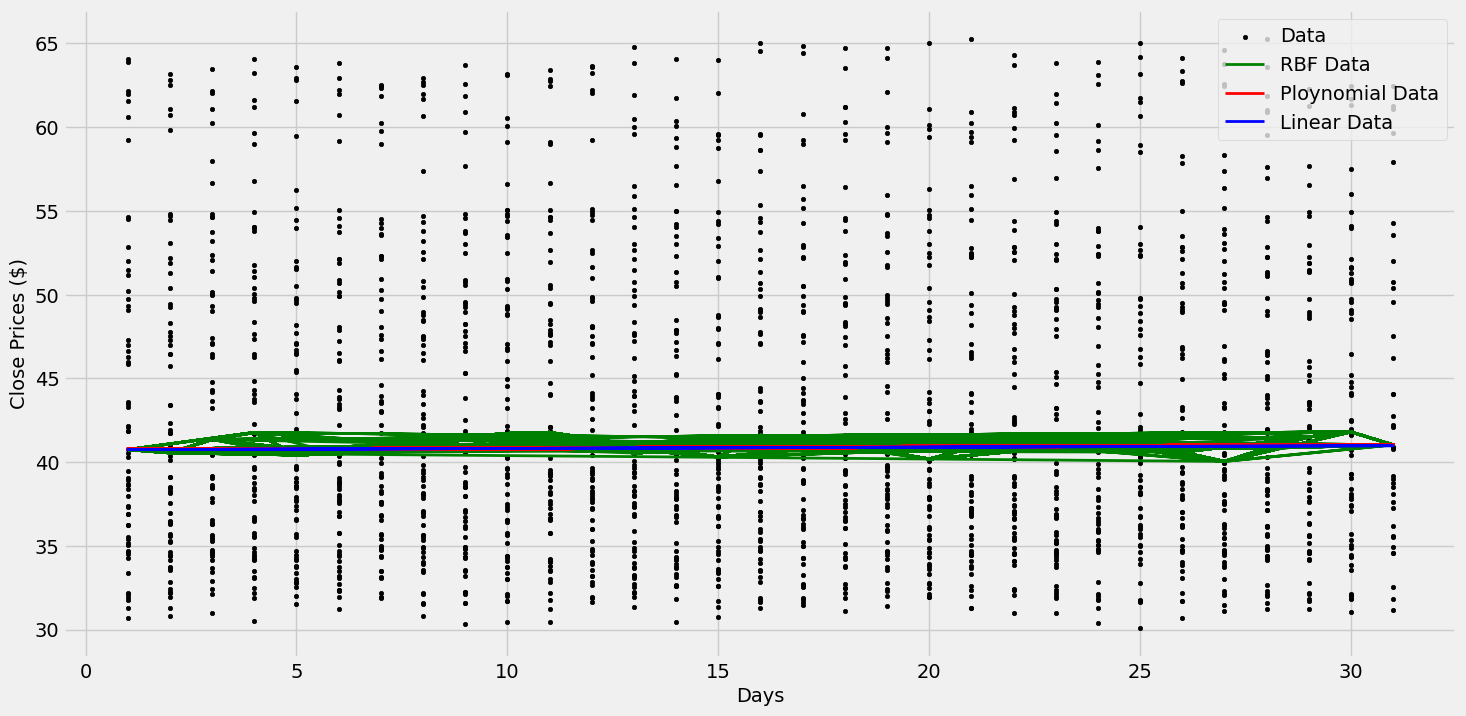

In [11]:
plt.figure(figsize = (16,8))
plt.scatter(days,close_prices, color = 'black' , label = 'Data', s=10)
plt.plot(days,rbf_svr.predict(days), color = 'green' , label = 'RBF Data' ,linewidth=2)
plt.plot(days,poly_svr.predict(days), color = 'red' , label = 'Ploynomial Data', linewidth=2)
plt.plot(days,lin_svr.predict(days), color = 'blue' , label = 'Linear Data', linewidth=2)
plt.xlabel('Days')
plt.ylabel('Close Prices ($)')
plt.legend()
plt.show()

In [12]:
day =[[25]]
print('The RBF predicted price: ' , rbf_svr.predict(day))
print('The Linear predicted price: ' , lin_svr.predict(day))
print('The Polynomial predicted price: ' , poly_svr.predict(day))

The RBF predicted price:  [41.02652928]
The Linear predicted price:  [40.93005145]
The Polynomial predicted price:  [40.94905736]


In [13]:
print('The actual price: ' , actual_price['Close'])

The actual price:  1968    59.389999
Name: Close, dtype: float64
